# Business Proposal

<img src="aluga-se.png">

Build a model to predict the cost of renting a certain property, such a model can be of extreme help to the client so that he can create new business strategies and have a better view of the market, depending on the region or period. 

Beyond that, this study seeks to answer some hypotheses such as:

. What is the distribution of the total rent for the property?

. What is the relationship between the values of rent and the location of the property?

. What is the relationship, if any, between features and property values?

The data for carrying out this project was taken from: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv

# 1.0 Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown
%matplotlib inline

# 1.1 Importing Dataset

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# 1.2 Dataset minimal cleaning

In [4]:
df.rename(columns={
    "area":"total_area_m2",
    "bathroom":"bathrooms",
    "parking spaces":"parking_spaces",
    "animal":"allowed_pets",
    "furniture":"is_furnished",
    "hoa (R$)":"hoa_fee",
    "rent amount (R$)": "rent_fee",
    "property tax (R$)": "property_tax",
    "fire insurance (R$)": "fire_insurance",
    "total (R$)":"total_fee"
}, inplace=True)

In [5]:
df.head()

,city,total_area_m2,rooms,bathrooms,parking_spaces,floor,allowed_pets,is_furnished,hoa_fee,rent_fee,property_tax,fire_insurance,total_fee
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
df.loc[df["allowed_pets"] == "acept", "allowed_pets"] = True
df.loc[df["allowed_pets"] == "not acept", "allowed_pets"] = False
df.loc[df["is_furnished"] == "furnished", "is_furnished"] = True
df.loc[df["is_furnished"] == "not furnished", "is_furnished"] = False

df.head()

,city,total_area_m2,rooms,bathrooms,parking_spaces,floor,allowed_pets,is_furnished,hoa_fee,rent_fee,property_tax,fire_insurance,total_fee
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836


# 2.0 Exploratory Data Analysis

### 2.1 General Dataset Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   total_area_m2   10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathrooms       10692 non-null  int64 
 4   parking_spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   allowed_pets    10692 non-null  object
 7   is_furnished    10692 non-null  object
 8   hoa_fee         10692 non-null  int64 
 9   rent_fee        10692 non-null  int64 
 10  property_tax    10692 non-null  int64 
 11  fire_insurance  10692 non-null  int64 
 12  total_fee       10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_area_m2,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathrooms,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking_spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa_fee,10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent_fee,10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property_tax,10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire_insurance,10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total_fee,10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


Data-types for a few columns are incorrect, using this step to fix them

In [9]:
unique_values_for_allowed_pets = df.allowed_pets.unique()
unique_values_for_is_furnished = df.is_furnished.unique()
unique_values_for_floor = df.floor.unique()

print("Allowed pets: ", unique_values_for_allowed_pets)
print("Is furnished: ", unique_values_for_is_furnished)
print("Floor: ", unique_values_for_floor)


Allowed pets:  [True False]
Is furnished:  [True False]
Floor:  ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


Floor column data-type seems to be incorrect due to the fact that properties that have no floors such as one story houses. Dealing with this by making the "-" sign as 0.

In [10]:
df.loc[df["floor"] == "-", "floor"] = 0

In [11]:
df.floor.unique()

array(['7', '20', '6', '2', '1', 0, '4', '3', '10', '11', '24', '9', '8',
       '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19',
       '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32'],
      dtype=object)

In [12]:
df.dtypes

city              object
total_area_m2      int64
rooms              int64
bathrooms          int64
parking_spaces     int64
floor             object
allowed_pets      object
is_furnished      object
hoa_fee            int64
rent_fee           int64
property_tax       int64
fire_insurance     int64
total_fee          int64
dtype: object

For columns: hoa_fee, rent_fee, property_tax, fire_insurance and total_fee, changing their types to float64, this is due to the fact that these columns express currency as their values, so a float64 dtype is better suited for currency values.
<br>
For column total_area_m2, also changing dtype to float64, even though right now in the dataframe there are only properties with their areas with whole numbers, however with new properties entering the database there is a possibility that these new properties have floating numbers as their area.
<br>
For columns: allowed_pets, is_furnished, changing their dtypes to bool, as they only display True or False values.

In [13]:
df2 = df.copy()

In [15]:
df2.floor.unique()

array(['7', '20', '6', '2', '1', 0, '4', '3', '10', '11', '24', '9', '8',
       '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19',
       '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32'],
      dtype=object)

In [21]:
df2.dtypes

city              object
total_area_m2      int64
rooms              int64
bathrooms          int64
parking_spaces     int64
floor             object
allowed_pets      object
is_furnished      object
hoa_fee            int64
rent_fee           int64
property_tax       int64
fire_insurance     int64
total_fee          int64
dtype: object

In [24]:
df2.astype({"allowed_pets": bool}, copy=False).dtypes

city              object
total_area_m2      int64
rooms              int64
bathrooms          int64
parking_spaces     int64
floor             object
allowed_pets        bool
is_furnished      object
hoa_fee            int64
rent_fee           int64
property_tax       int64
fire_insurance     int64
total_fee          int64
dtype: object

In [26]:
df2.dtypes

city              object
total_area_m2      int64
rooms              int64
bathrooms          int64
parking_spaces     int64
floor             object
allowed_pets      object
is_furnished      object
hoa_fee            int64
rent_fee           int64
property_tax       int64
fire_insurance     int64
total_fee          int64
dtype: object

In [ ]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

There are no missing values

In [6]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


Checking total value distribution as well as outliers.

Text(0.5, 1.0, 'Distribution of Total (R$)')

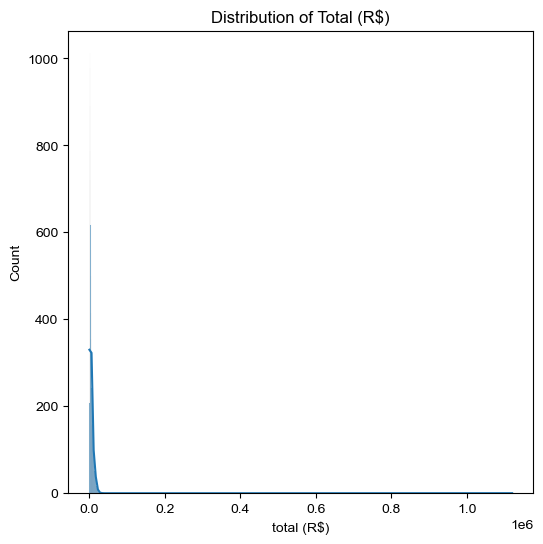

In [7]:
plt.figure(figsize = (6,6))
sns.histplot(df['total (R$)'], kde = True)
sns.set_style('whitegrid')
plt.title("Distribution of Total (R$)")

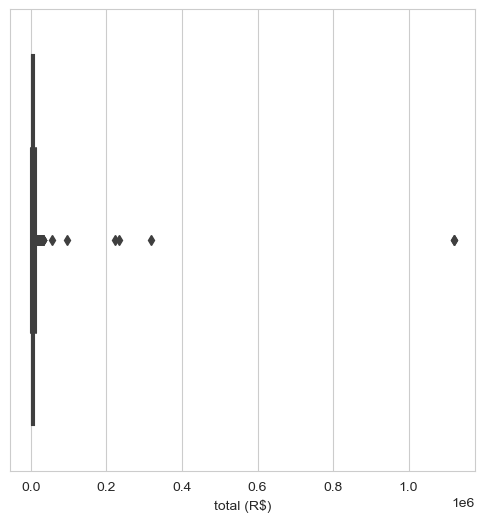

In [8]:
plt.figure(figsize = (6,6))
sns.boxplot(x = df['total (R$)'])
sns.set_style('whitegrid')

Large presence of outliers, attempt to remove them with the assistance of IQR-Score.

In [9]:
q1 = df['total (R$)'].quantile(0.25)
q3 = df['total (R$)'].quantile(0.75)

IQR = q3 - q1
Inferior = q1 - (1.5 * IQR)
Superior = q3 + (1.5 * IQR)

In [10]:
df = df[~((df['total (R$)'] < Inferior) | (df['total (R$)'] > Superior))]

In [11]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


After removing the outliers, the dataset showed the removal of 1096 values ​​from the original dataset, representing a loss of approximately 10.25% of the data.

Checking new distribution, after removing outliers

Text(0.5, 1.0, 'Distribution of Total (R$) without Outliers')

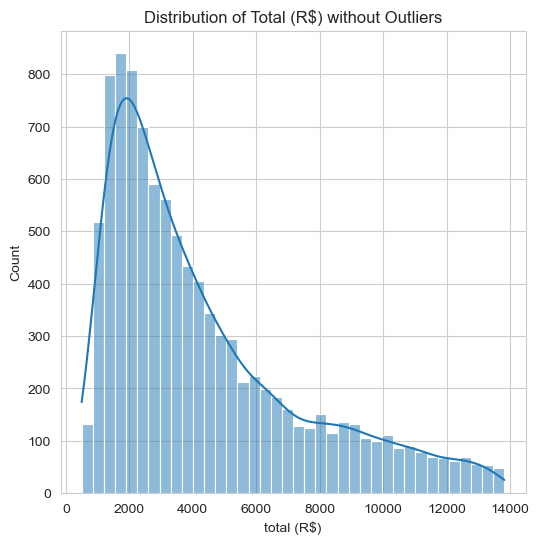

In [12]:
plt.figure(figsize = (6,6))
sns.histplot(df['total (R$)'], kde = True)
sns.set_style('whitegrid')
plt.title("Distribution of Total (R$) without Outliers")

(9.5, -0.5)

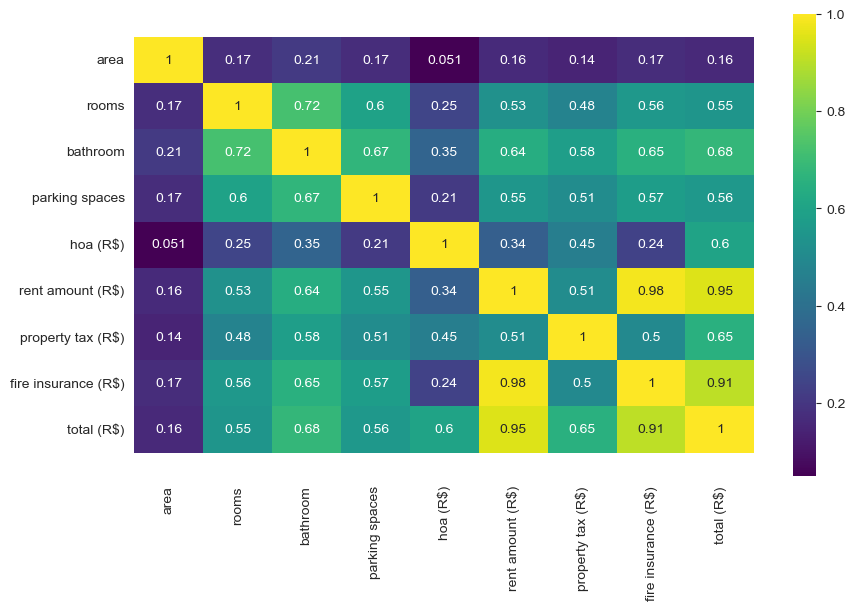

In [13]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.corr(),annot=True,cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From the correlation graph and the total value distribution, we can answer some questions:

. The total value of rent appears to have an asymmetric distribution to the right, with most properties having a total value of R$ 2000,00.

. The rent, fire insurance, tax and HOA values appear to be highly correlated with the total amount as expected.

. It can also be noted a certain correlation between the number of bedrooms and bathrooms with the total value of the property, but a deeper analysis will be carried out later.

## 2.2 City

In [14]:
df.groupby('city')['total (R$)'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Belo Horizonte,1185.0,3808.147679,2940.263971,499.0,1583.00,2813.0,5024.00,13810.0
Campinas,842.0,2999.982185,2425.546191,711.0,1413.00,2113.0,3571.25,13670.0
Porto Alegre,1178.0,2795.798812,2075.562836,509.0,1455.50,2192.0,3293.75,13560.0
Rio de Janeiro,1442.0,4032.551318,2713.122388,507.0,2042.25,3127.0,5156.75,13810.0
São Paulo,5339.0,5093.249110,3236.939736,508.0,2531.50,4136.0,7062.00,13820.0


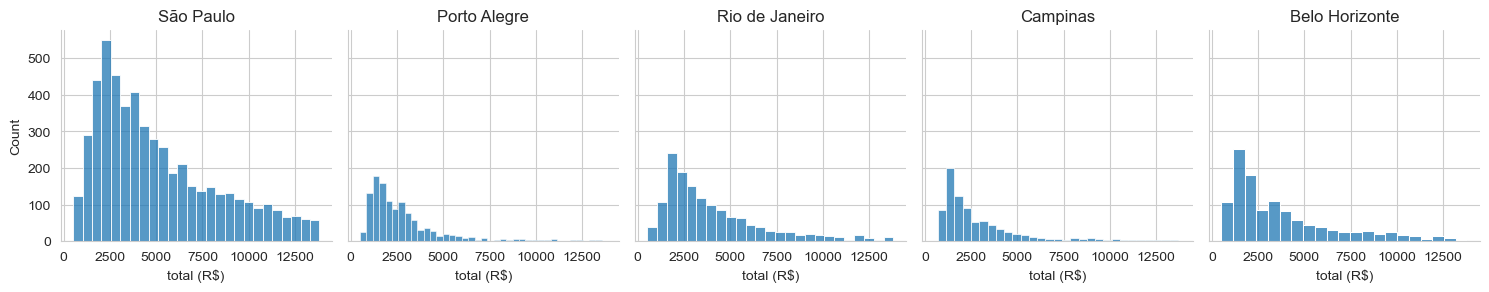

In [15]:
g = sns.FacetGrid(df, col = 'city',col_wrap=5)
g = g.map(sns.histplot,'total (R$)',kde=False)
g.fig.tight_layout()
axes = g.axes.flatten()
axes[0].set_title("São Paulo")
axes[1].set_title("Porto Alegre")
axes[2].set_title("Rio de Janeiro")
axes[3].set_title("Campinas")
axes[4].set_title("Belo Horizonte")
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

With this data, we can present a few points:

. Most properties for rent are in São Paulo with approximately 5400 properties.

. São Paulo also has a higher average of rental values, which can be caused by factors we will explore later.

. Although Campinas and São Paulo are in the same state, there is a big difference in rent values ​​between the two cities.

## 2.3 Area

In [16]:
df['area'].describe()

count     9986.000000
mean       131.632886
std        492.747146
min         11.000000
25%         55.000000
50%         85.000000
75%        160.000000
max      46335.000000
Name: area, dtype: float64

Text(0.5, 1.0, 'Distribution of Area')

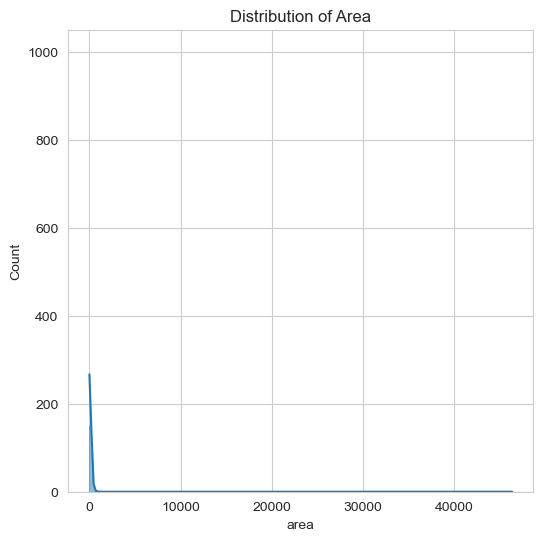

In [17]:
plt.figure(figsize = (6,6))
sns.histplot(df['area'], kde = True)
sns.set_style('whitegrid')
plt.title("Distribution of Area")

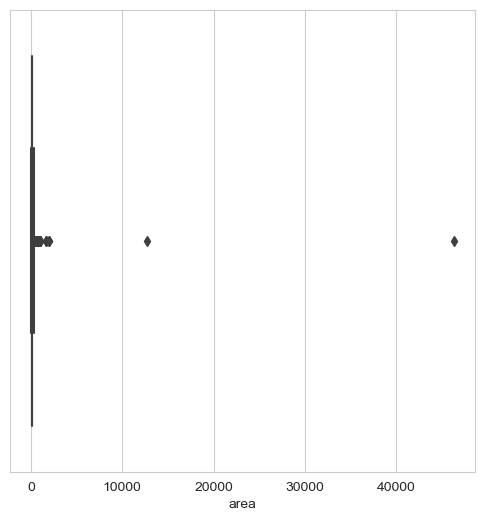

In [18]:
plt.figure(figsize = (6,6))
sns.boxplot(x = df['area'])
sns.set_style('whitegrid')

In [19]:
df[df['area']>1000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
654,São Paulo,1600,6,6,6,-,acept,furnished,0,7600,1834,115,9549
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
2423,Belo Horizonte,1020,5,4,6,-,acept,furnished,0,6520,654,107,7281
4813,São Paulo,1600,4,5,12,-,acept,not furnished,1,6900,5000,104,12010
5129,Belo Horizonte,2000,4,2,3,-,acept,not furnished,0,4956,200,82,5238
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


It is possible to notice the presence of some outliers in the area feature, choosing to remove them to improve the analysis.

In [20]:
df = df.drop(df[df['area']>1000].index)

Text(0.5, 1.0, 'Distribution of Area without Outliers')

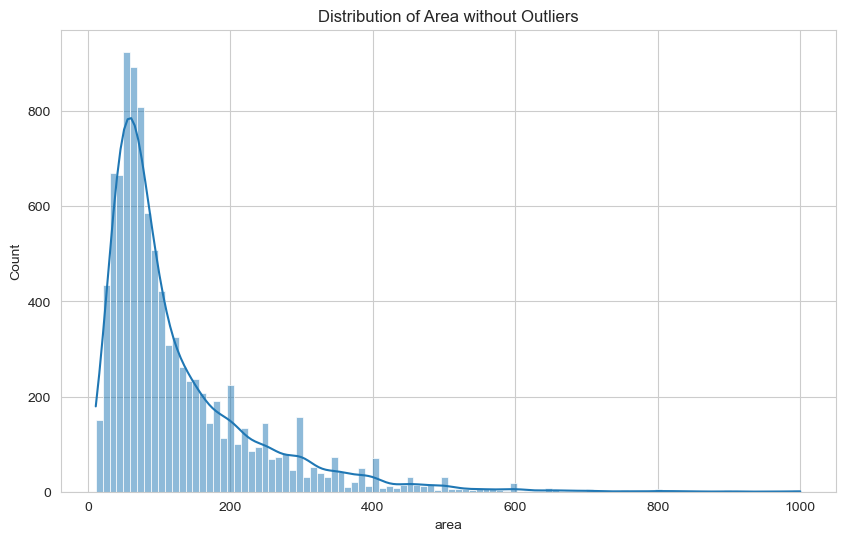

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(df['area'], kde = True)
sns.set_style('whitegrid')
plt.title("Distribution of Area without Outliers")

After the removal of the outliers the value of area presents an asymmetric distribution to the right, with most of the properties having an total area of 85 m².

In [22]:
df.corr()['area'].sort_values(ascending=False)

area                   1.000000
bathroom               0.758467
rooms                  0.712997
fire insurance (R$)    0.685954
parking spaces         0.675172
total (R$)             0.644425
rent amount (R$)       0.641735
property tax (R$)      0.594951
hoa (R$)               0.221472
Name: area, dtype: float64

Here we can see the obvious correlation between the number of rooms and bathrooms and the area, this happens due to the fact that the greater the number of rooms in the property, the larger the area will be.

But what is the correlation between the area and the total value?

Text(0.5, 1.0, 'Total (R$) x Area')

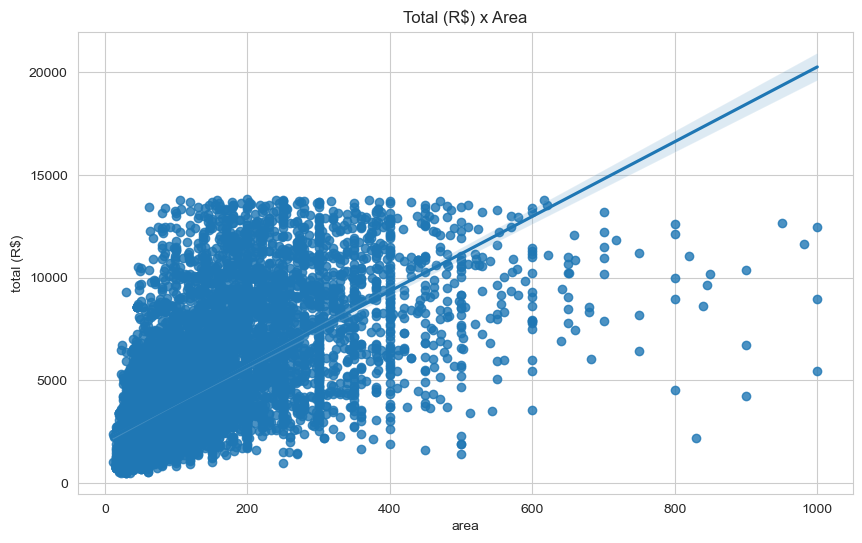

In [23]:
plt.figure(figsize = (10,6))
sns.regplot(x = df['area'],y = df['total (R$)'])
sns.set_style('whitegrid')
plt.title("Total (R$) x Area")

The features seem to have some kind of correlation, but nothing concrete, or totally linear.

## 2.4 Bathrooms and Rooms

In [24]:
quartos_banheiros = pd.DataFrame({'Bathroom': df['bathroom'].describe(), 'Rooms': df['rooms'].describe()}).transpose()
quartos_banheiros['mode'] = [1,3]
quartos_banheiros

,count,mean,std,min,25%,50%,75%,max,mode
Bathroom,9979.0,2.084978,1.280391,1.0,1.0,2.0,3.0,10.0,1
Rooms,9979.0,2.415773,1.129337,1.0,2.0,2.0,3.0,10.0,3


We are able to see that on average most properties have between 2 and 3 rooms and between 1 and 2 bathrooms.

Text(0.5, 1.0, 'Total Rent x Number of Bathrooms')

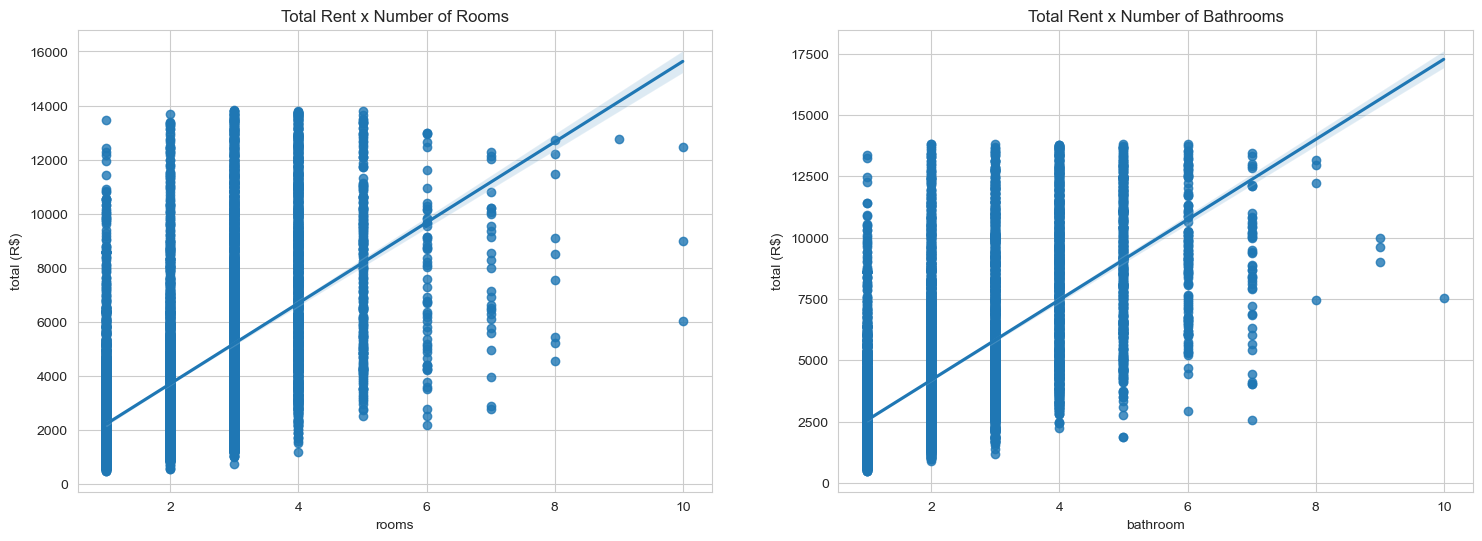

In [25]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

#Rooms
sns.regplot(ax=axes[0], x=df['rooms'], y=df['total (R$)'])
sns.set_style('whitegrid')
axes[0].set_title('Total Rent x Number of Rooms')

#Bathrooms
sns.regplot(ax=axes[1], x=df['bathroom'], y=df['total (R$)'])
sns.set_style('whitegrid')
axes[1].set_title('Total Rent x Number of Bathrooms')

As expected we can see that the higher number of rooms/bathrooms the higher will be the total rent.

## 2.5 Parking Spaces

In [26]:
df.groupby('city')[['parking spaces','total (R$)']].mean()

,parking spaces,total (R$)
city,,
Belo Horizonte,1.835732,3794.791702
Campinas,1.514863,3000.675386
Porto Alegre,1.024618,2795.798812
Rio de Janeiro,0.694868,4032.551318
São Paulo,1.672288,5091.118231


It seems like most properties have on average between one and two parking spaces, with São Paulo and Belo Horizonte coming ahead with the  higher averages, with 1.67 and 1.83 parking spaces respectively. It's also something to notice that even though most properties in Rio de Janeiro have on average only 0.69 parking spaces, they have the third highest total value of rent.

Text(0.5, 1.0, 'Total (R$) x Parking Spaces')

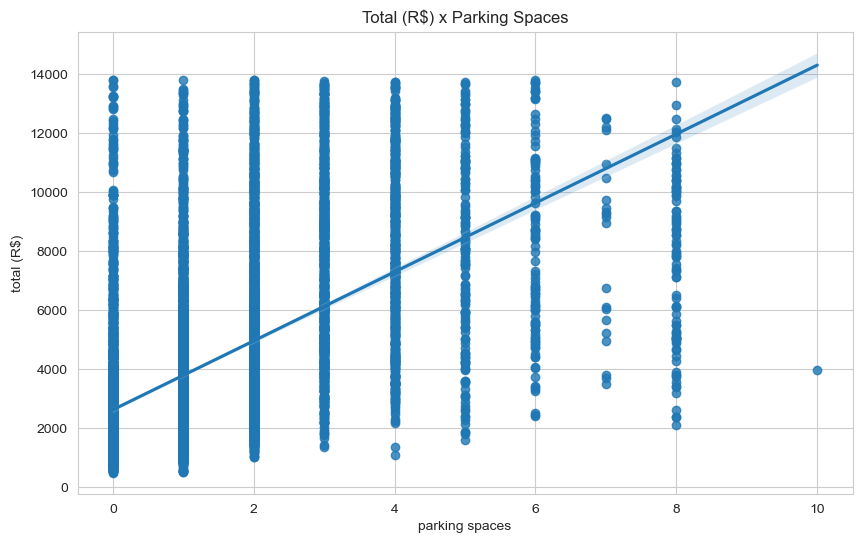

In [27]:
plt.figure(figsize = (10,6))
sns.regplot(x = df['parking spaces'],y = df['total (R$)'])
sns.set_style('whitegrid')
plt.title("Total (R$) x Parking Spaces")

Also as expected, we can see that higher the number of parking spaces the higher will be the total value of rent.

## 2.6 Floor

Due to the fact that doesn't seem to be any correlation between the floor in witch the property is located and the total rent value, and also the fact that this feature doesn't seem to have any importance for this analysis, this feature will be removed from the DataFrame.

In [28]:
df = df.drop('floor',axis=1)

## 2.7 Animals/Pets

Firstly let's change this feature in a way that properties that accept pets are labeled with a value of 1 and properties that don't accept pets will be labeled with a value of 0.

In [29]:
df['animal'] = df['animal'].map({'acept':1,'not acept':0})

In [30]:
permitem_animais = df[df['animal']==1].groupby('city')['animal'].count()
nao_permitem_animais = df[df['animal']==0].groupby('city')['animal'].count()
animais = pd.merge(permitem_animais,nao_permitem_animais, right_index = True, left_index = True)
animais.rename(columns={'animal_x':'Allow Pets','animal_y':"Doesn't Allow Pets"},inplace=True)
animais

,Allow Pets,Doesn't Allow Pets
city,,
Belo Horizonte,875,306
Campinas,682,159
Porto Alegre,992,186
Rio de Janeiro,1155,287
São Paulo,4030,1307


As we can see above, in all cities we have in the dataframe most of the properties allow people to have pets, with only a few not allowing them. Now let's see how this has any effect on the total value of rent. 

In [31]:
df.groupby('animal')['total (R$)'].mean()

animal
0    3927.473942
1    4456.649341
Name: total (R$), dtype: float64

Text(0.5, 1.0, 'Total (R$) x Pets')

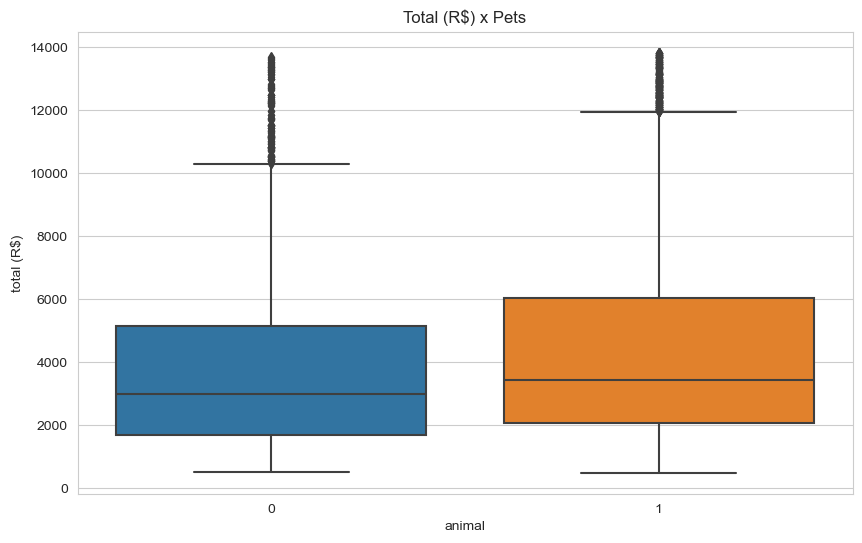

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(x='animal',y='total (R$)',data=df)
sns.set_style('whitegrid')
plt.title("Total (R$) x Pets")

As we can see the total value of rent seem to be higher in properties that allow pets, altought the difference of this value is not that big. 

## 2.8 Furniture

This feature we will do the same as what we did the animal/pets feature. For properties that are furnished we will label them with a 1 value and for properties that are not furnished we will label them with a 0 value.

In [33]:
df['furniture'] = df['furniture'].map({'furnished':1,'not furnished':0})

In [34]:
mobiliadas = df[df['furniture']==1].groupby('city')['furniture'].count()
nao_mobiliadas = df[df['furniture']==0].groupby('city')['furniture'].count()
mobilia = pd.merge(mobiliadas,nao_mobiliadas, right_index = True, left_index = True)
mobilia.rename(columns={'furniture_x':'Furnished','furniture_y':"Not Furnished"},inplace=True)
mobilia['Furnished Percentage'] = (mobilia['Furnished']/(mobilia['Furnished']+mobilia['Not Furnished']))*100
mobilia

,Furnished,Not Furnished,Furnished Percentage
city,,,
Belo Horizonte,156,1025,13.209145
Campinas,109,732,12.960761
Porto Alegre,314,864,26.655348
Rio de Janeiro,381,1061,26.421637
São Paulo,1398,3939,26.194491


As we can see in all cities most properties for rent are not furnished, with Porto Alegre, Rio and São Paulo with around 26% of their properties being furnished. 

In [35]:
df.groupby('furniture')['total (R$)'].mean()

furniture
0    4022.718672
1    5355.286684
Name: total (R$), dtype: float64

Text(0.5, 1.0, 'Total (R$) x Furniture')

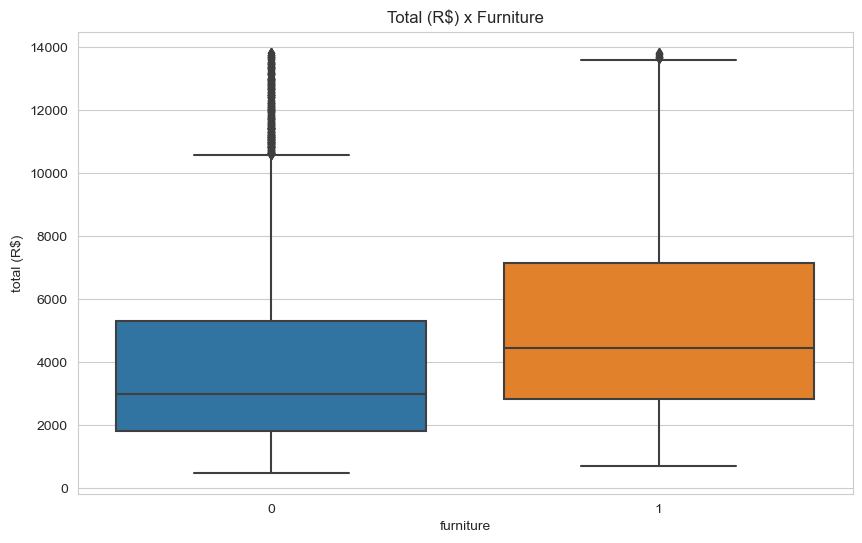

In [36]:
plt.figure(figsize = (10,6))
sns.boxplot(x='furniture',y='total (R$)',data=df)
sns.set_style('whitegrid')
plt.title("Total (R$) x Furniture")

As seen in the graph above, properties that are furnished have on avarege a higher total rent price, this is to be expected with all the costs necessary for furnishing a house/apartment.

## 2.9 HOA 

In [37]:
df['hoa (R$)'].describe()

count    9979.000000
mean      781.933961
std       860.884571
min         0.000000
25%       161.000000
50%       530.000000
75%      1100.000000
max      8000.000000
Name: hoa (R$), dtype: float64

Text(0.5, 1.0, 'Distribution of HOA (R$)')

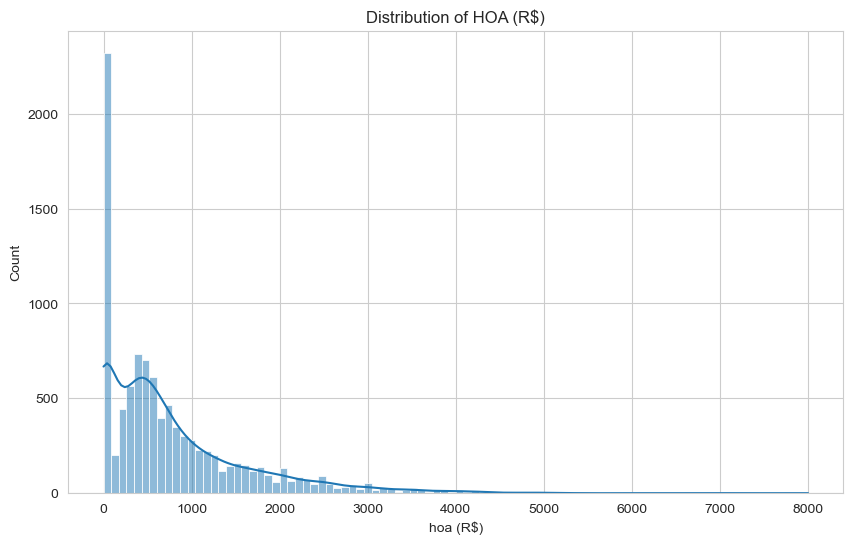

In [38]:
plt.figure(figsize = (10,6))
sns.histplot(df['hoa (R$)'], kde = True)
sns.set_style('whitegrid')
plt.title("Distribution of HOA (R$)")

It seems like most properties in the dataframe have no HOA costs, this could be made of properties such as houses that are not inside condominiums, so they don'nt have HOA as an expense.

In [39]:
com_condiminio = df.drop(df[df['hoa (R$)']==0].index)
com_condiminio.describe()['hoa (R$)']

count    7766.000000
mean     1004.753927
std       853.482062
min         1.000000
25%       413.000000
50%       700.000000
75%      1319.250000
max      8000.000000
Name: hoa (R$), dtype: float64

Text(0.5, 1.0, 'Distribution of HOA (R$) without 0 values')

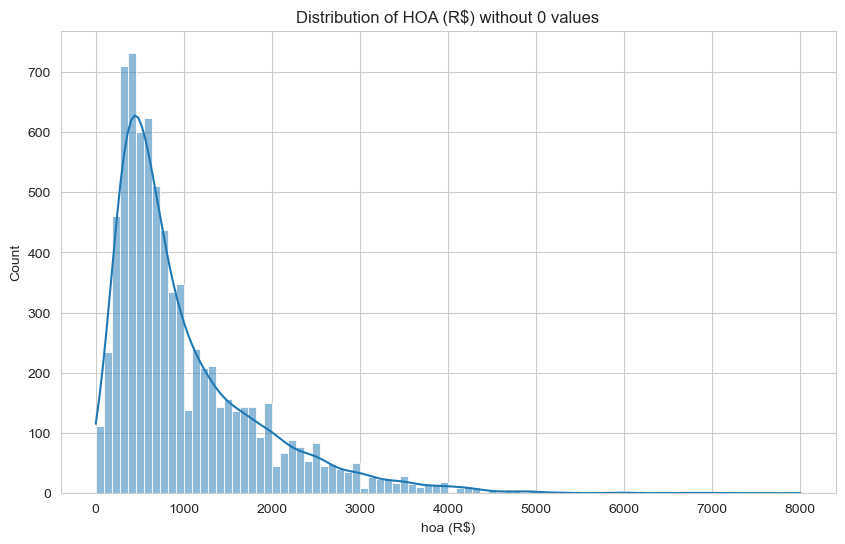

In [40]:
plt.figure(figsize = (10,6))
sns.histplot(com_condiminio['hoa (R$)'],kde = True)
sns.set_style('whitegrid')
plt.title("Distribution of HOA (R$) without 0 values")

With only the properties that have to pay for the HOA, the value of HOA presents with a assimetric distribution to the right with most properties having around 700 to 900 reais of HOA costs.

## 2.10 Property Tax

In [41]:
df['property tax (R$)'].describe()

count    9979.000000
mean      248.946488
std       385.312237
min         0.000000
25%        34.000000
50%       109.000000
75%       300.000000
max      5404.000000
Name: property tax (R$), dtype: float64

In [42]:
df.corr()['property tax (R$)'].sort_values(ascending=False)

property tax (R$)      1.000000
total (R$)             0.656347
area                   0.594951
bathroom               0.579668
rent amount (R$)       0.509150
parking spaces         0.502540
fire insurance (R$)    0.497869
rooms                  0.478254
hoa (R$)               0.459748
animal                 0.083217
furniture              0.025079
Name: property tax (R$), dtype: float64

Text(0.5, 1.0, 'Area x Property Tax (R$)')

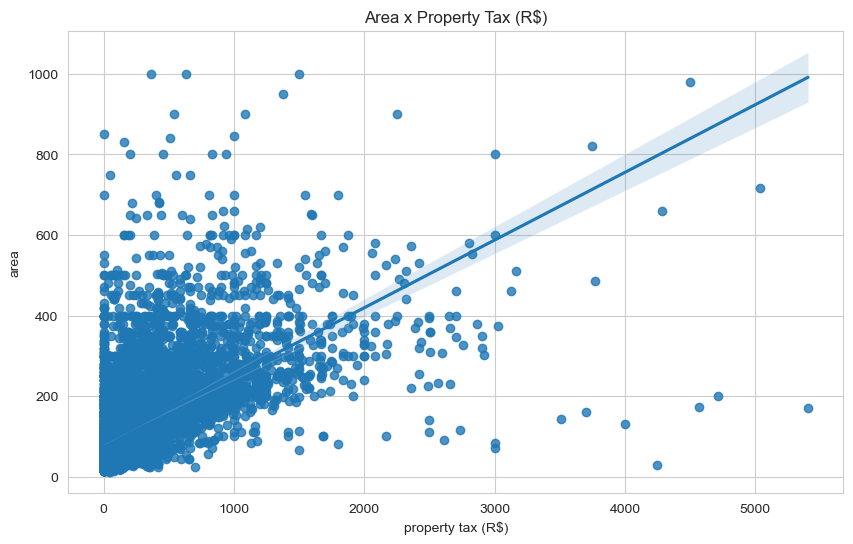

In [43]:
plt.figure(figsize = (10,6))
sns.regplot(x = df['property tax (R$)'],y = df['area'])
sns.set_style('whitegrid')
plt.title("Area x Property Tax (R$)")

As we can see by the above table and graph, even though we have a high correlation score between the area value and the property tax, and also one could assume that the bigger the property the higher the tax of that property would be, there isn't a concrete linearity between the two features, with a few properties having a low area value but having higher taxes than avarege. This could be explained through the fact that the tax value of certain property is not only determined by the area value, having other aspects to it's formulation, such as location.

In [44]:
df.groupby('city')[['property tax (R$)','total (R$)']].mean()

,property tax (R$),total (R$)
city,,
Belo Horizonte,220.127858,3794.791702
Campinas,137.112961,3000.675386
Porto Alegre,117.033956,2795.798812
Rio de Janeiro,199.411234,4032.551318
São Paulo,315.446318,5091.118231


Once again São Paulo coming as of the most costly cities, having on avarege the highest property tax of all the cities in this study.

## 2.11 Fire Insurance

In [45]:
df['fire insurance (R$)'].describe()

count    9979.000000
mean       44.716104
std        34.222927
min         3.000000
25%        20.000000
50%        33.000000
75%        58.000000
max       214.000000
Name: fire insurance (R$), dtype: float64

In [46]:
df.corr()['fire insurance (R$)'].sort_values(ascending=False)

fire insurance (R$)    1.000000
rent amount (R$)       0.983966
total (R$)             0.907221
area                   0.685954
bathroom               0.652504
parking spaces         0.573454
rooms                  0.554351
property tax (R$)      0.497869
hoa (R$)               0.238023
furniture              0.149808
animal                 0.082174
Name: fire insurance (R$), dtype: float64

Text(0.5, 1.0, 'Area x Fire Insurance (R$)')

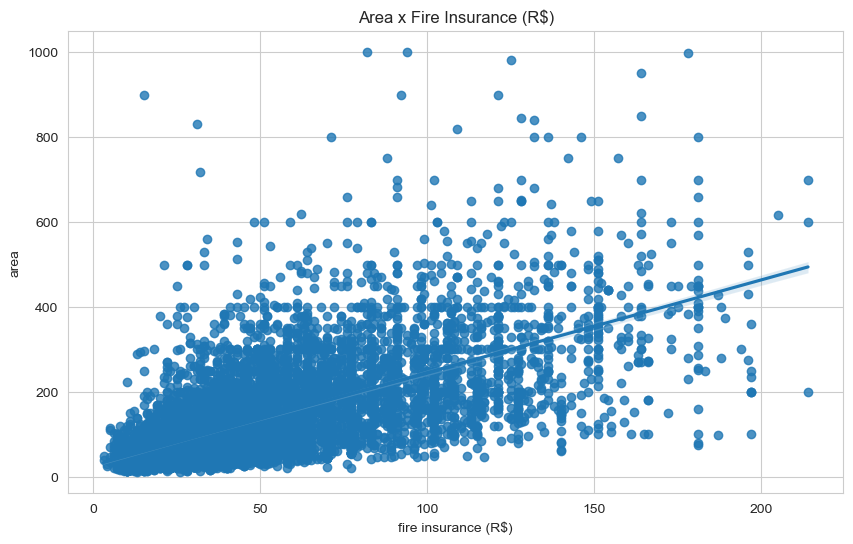

In [47]:
plt.figure(figsize = (10,6))
sns.regplot(x=df['fire insurance (R$)'],y=df['area'])
sns.set_style('whitegrid')
plt.title("Area x Fire Insurance (R$)")

As seen above by both table and graph, the same behaviour observed in the property tax feature seems to be happening with the fire insurance feature. With it having a high correlation score with the area, this could be explained due to the fact that the area of the property is used as a factor for the calculation of the fire insurance that is due to that property.

In [48]:
df.groupby('city')[['fire insurance (R$)','total (R$)']].mean()

,fire insurance (R$),total (R$)
city,,
Belo Horizonte,44.572396,3794.791702
Campinas,30.458977,3000.675386
Porto Alegre,34.059423,2795.798812
Rio de Janeiro,37.237864,4032.551318
São Paulo,51.367248,5091.118231


This time we can't see that much of a difference between cities when it comes to fire insurance costs.

## Getting dummies for city feature

In [49]:
dummies = pd.get_dummies(df['city'],drop_first=True)
df = df.drop('city',axis=1)
df = pd.concat([df,dummies],axis=1)

# 3.0 Data Pre Processing

In [50]:
X = df.drop('total (R$)',axis=1)
y = df['total (R$)']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 4.0 Prediction Analasys with ML 

In this section let's explore different ML algorithms and see witch performs bests, so that wee can make a decision of witch one will be our model.

## 4.1 Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [54]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [55]:
display(Markdown('The Linear Regression Model achieved a R² Score of {:.7f}' .format(r2_score(y_test,model_lr.predict(X_test)))))

The Linear Regression Model achieved a R² Score of 0.9999945

## 4.2 Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree

In [57]:
model_dtr = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10, random_state=101)
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5,
                      random_state=101)

In [58]:
display(Markdown('The Decision Tree Model achieved a R² Score of {:.6f}' .format(r2_score(y_test,model_dtr.predict(X_test)))))

The Decision Tree Model achieved a R² Score of 0.927871

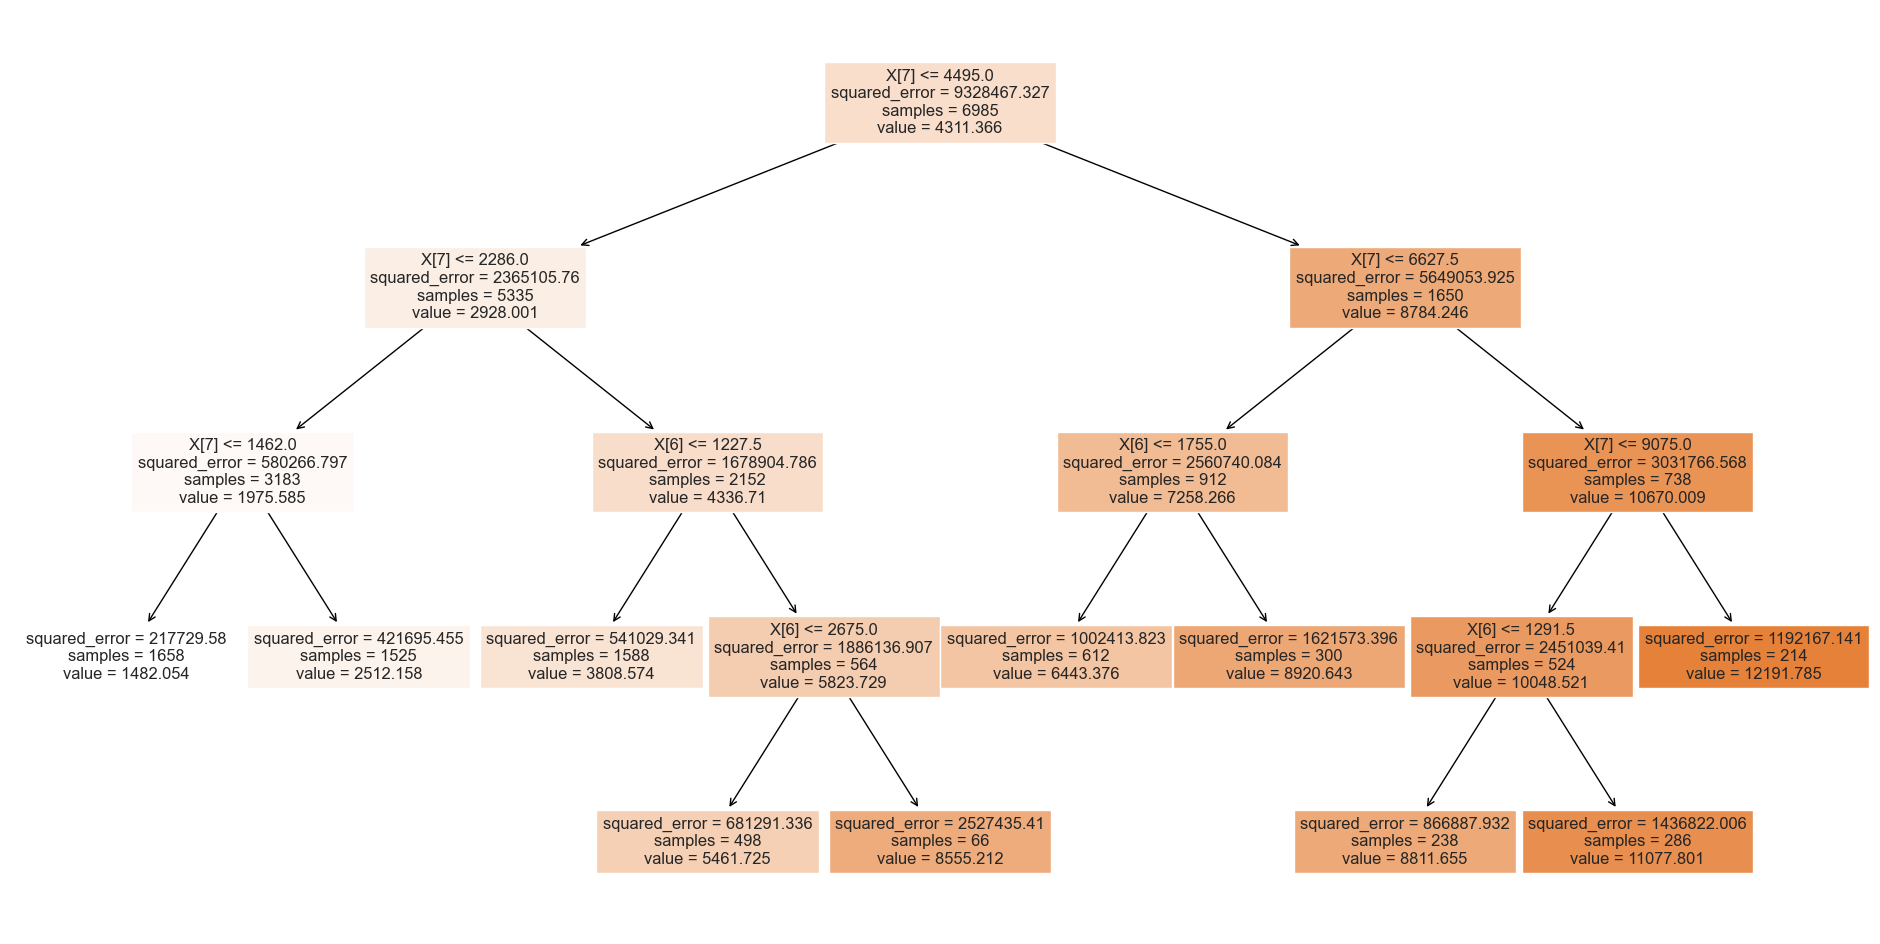

In [59]:
fig, ax = plt.subplots(figsize=(24,12))
out = tree.plot_tree(model_dtr,filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

Using GridSearchCV for hyperparameters tuning.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [62]:
Grid_CV_dtr = GridSearchCV(model_dtr, param_grid, cv=5)

In [63]:
Grid_CV_dtr.fit(X_train,y_train)

d:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and wi

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=101),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [64]:
display(Markdown('After tuning the Decision Tree model achieved a R² Score of {:.6f}' .format(Grid_CV_dtr.best_score_)))
display(Markdown('This score was achieved with the following Hyperparameters: {}' .format(Grid_CV_dtr.best_params_)))

After tuning the Decision Tree model achieved a R² Score of 0.982638

This score was achieved with the following Hyperparameters: {'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}

## 4.3 Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
model_rfr = RandomForestRegressor(n_estimators = 10, random_state=101)
model_rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

In [67]:
display(Markdown('The Random Forest Model achieved a R² Score of {:.6f}' .format(r2_score(y_test,model_rfr.predict(X_test)))))

The Random Forest Model achieved a R² Score of 0.996090

## 4.4 SVM Regression

In [68]:
from sklearn.svm import SVR 

In [69]:
model_svm = SVR()
model_svm.fit(X_train,y_train)

SVR()

In [70]:
display(Markdown('The SVM Model achieved a R² Score of {:.6f}' .format(r2_score(y_test,model_svm.predict(X_test)))))

The SVM Model achieved a R² Score of 0.442473

## 4.5 Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)

Ridge()

In [73]:
display(Markdown('The Ridge Regression Model achieved a R² Score of {:.7f}' .format(r2_score(y_test,model_ridge.predict(X_test)))))

The Ridge Regression Model achieved a R² Score of 0.9999945

## 4.6 Lasso Regression

In [74]:
from sklearn.linear_model import Lasso 

In [75]:
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

Lasso()

In [76]:
display(Markdown('The Lasso Regression Model achieved a R² Score of {:.7f}' .format(r2_score(y_test,model_lasso.predict(X_test)))))

The Lasso Regression Model achieved a R² Score of 0.9999945

## 4.7 Model Evaluation

In [77]:
Models_Names = ['Linear Regression','Decision Tree Regression','Optimized Decision Tree','Random Forest Regression',
               'SMVM Regression','Ridge Regression','Lasso Regression']

R2_Scores = [r2_score(y_test,model_lr.predict(X_test)),r2_score(y_test,model_dtr.predict(X_test)),Grid_CV_dtr.best_score_,
             r2_score(y_test,model_rfr.predict(X_test)),r2_score(y_test,model_svm.predict(X_test)),
            r2_score(y_test,model_ridge.predict(X_test)),r2_score(y_test,model_lasso.predict(X_test))]

models = pd.DataFrame(data={'R² Score': R2_Scores}, index= Models_Names)
models

,R² Score
Linear Regression,0.999995
Decision Tree Regression,0.927871
Optimized Decision Tree,0.982638
Random Forest Regression,0.996090
SMVM Regression,0.442473
Ridge Regression,0.999995
Lasso Regression,0.999995


After building the models above we can see that the Linear, Ridge and Lasso Regression Models achieved a very high R² Score. For the sake of this study we will be choosing the Ridge Regression model since it is able to adress some of the problems of Ordinary Least Squares.

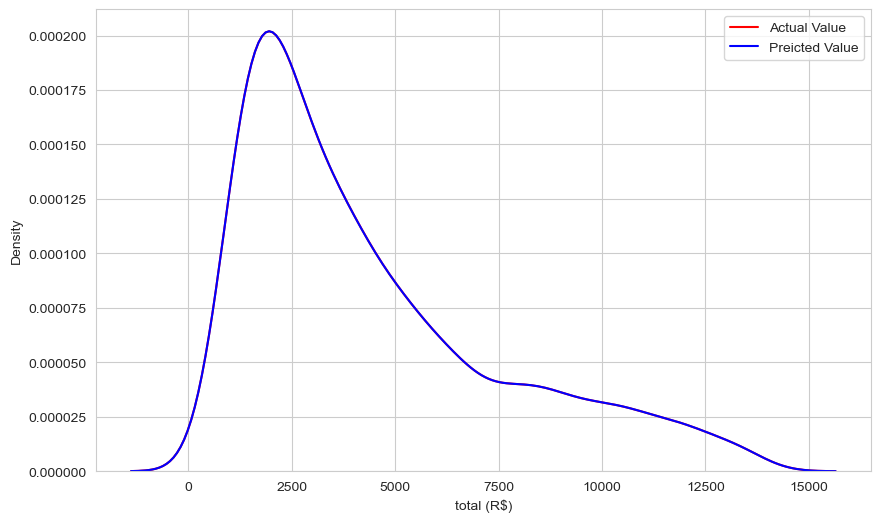

In [78]:
plt.figure(figsize=(10,6))
sns.kdeplot(y_test,color ="r",label ="Actual Value")
sns.kdeplot(model_ridge.predict(X_test),color ="b", label = "Preicted Value")
plt.legend()

## 4.8 Saving Model

In [79]:
import joblib

In [80]:
joblib.dump(model_ridge,"Ridge_Model")

['Ridge_Model']

# Conclusion

After analysing this data, we were able to see how the features correlated with the target feature and also with eachother, being also able to answer our initial hypotesis, beyond other questions related with the problem in hand. Ending the analysis with a good predictive model, that could be used for further use.